# Eigenfaces dan SVD untuk Pengenalan Wajah

##Instalasi dan Persiapan Dataset

In [ ]:
import os
import zipfile
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
from prettytable import PrettyTable

# Fungsi untuk mengunduh dan mengekstrak dataset
def download_and_extract_dataset():
    url = "https://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.zip"
    dataset_dir = "att_faces"

    if not os.path.exists(dataset_dir):
        print("Mengunduh dataset...")
        try:
            r = requests.get(url, timeout=30)
            r.raise_for_status()
            z = zipfile.ZipFile(BytesIO(r.content))
            print("Mengekstrak dataset...")
            z.extractall()
            print("Dataset siap.")
        except requests.exceptions.RequestException as e:
            print(f"Gagal mengunduh dataset: {e}")
            return None, None
    else:
        print("Dataset sudah ada.")

    for root, dirs, files in os.walk("."):
        if "s1" in dirs and "s2" in dirs:
            return root, (92, 112)

    print("Struktur folder dataset tidak seperti yang diharapkan.")
    return None, None

DATASET_PATH, IMAGE_DIMS = download_and_extract_dataset() # path berasal dari root, dan IMAGE_DIMS= (92,112) jika gambar diperoleh.

# IMAGE_DIMS adalah tuple (a,b) dengan a dan b dimensi dari gambar. Jika ada nilainya, maka akan bernilai "True"
if IMAGE_DIMS:
    IMG_HEIGHT, IMG_WIDTH = IMAGE_DIMS # Komponen pertama tinggi gambar, dan komponen kedua adalah lebar gambar
    IMG_SIZE = IMG_HEIGHT * IMG_WIDTH # Ukuran gambar adalah luas gambar


Mengunduh dataset...
Mengekstrak dataset...
Dataset siap.


##Memuat dan Memproses Gambar

In [ ]:

def load_images(path, num_subjects=6, num_train=4, num_test=4):
    """Loads images, flattens them, and splits into training and testing sets."""
    train_images, train_labels = [], []
    test_images, test_labels = [], []

    print("\nMemuat gambar...")
    for i in range(1, num_subjects + 1):
        subject_dir = os.path.join(path, f"s{i}")
        image_files = sorted([f for f in os.listdir(subject_dir) if f.endswith('.pgm')])

        for j in range(num_train):
            img = Image.open(os.path.join(subject_dir, image_files[j]))
            train_images.append(np.array(img, dtype=np.float32).flatten())
            train_labels.append(i)

        for j in range(num_train, num_train + num_test):
            img = Image.open(os.path.join(subject_dir, image_files[j]))
            test_images.append(np.array(img, dtype=np.float32).flatten())
            test_labels.append(i)

    print(f"Total gambar latih: {len(train_images)}")
    print(f"Total gambar uji: {len(test_images)}")

    return (
        np.array(train_images).T, np.array(train_labels),
        np.array(test_images).T, np.array(test_labels)
    )

if DATASET_PATH:
    X_train, y_train, X_test, y_test = load_images(DATASET_PATH)
    print(f"Bentuk matriks data latih (X_train): {X_train.shape}")
    print(f"Bentuk matriks data uji (X_test): {X_test.shape}")
else:
    print("Tidak dapat melanjutkan tanpa dataset.")




Memuat gambar...
Total gambar latih: 24
Total gambar uji: 24
Bentuk matriks data latih (X_train): (10304, 24)
Bentuk matriks data uji (X_test): (10304, 24)


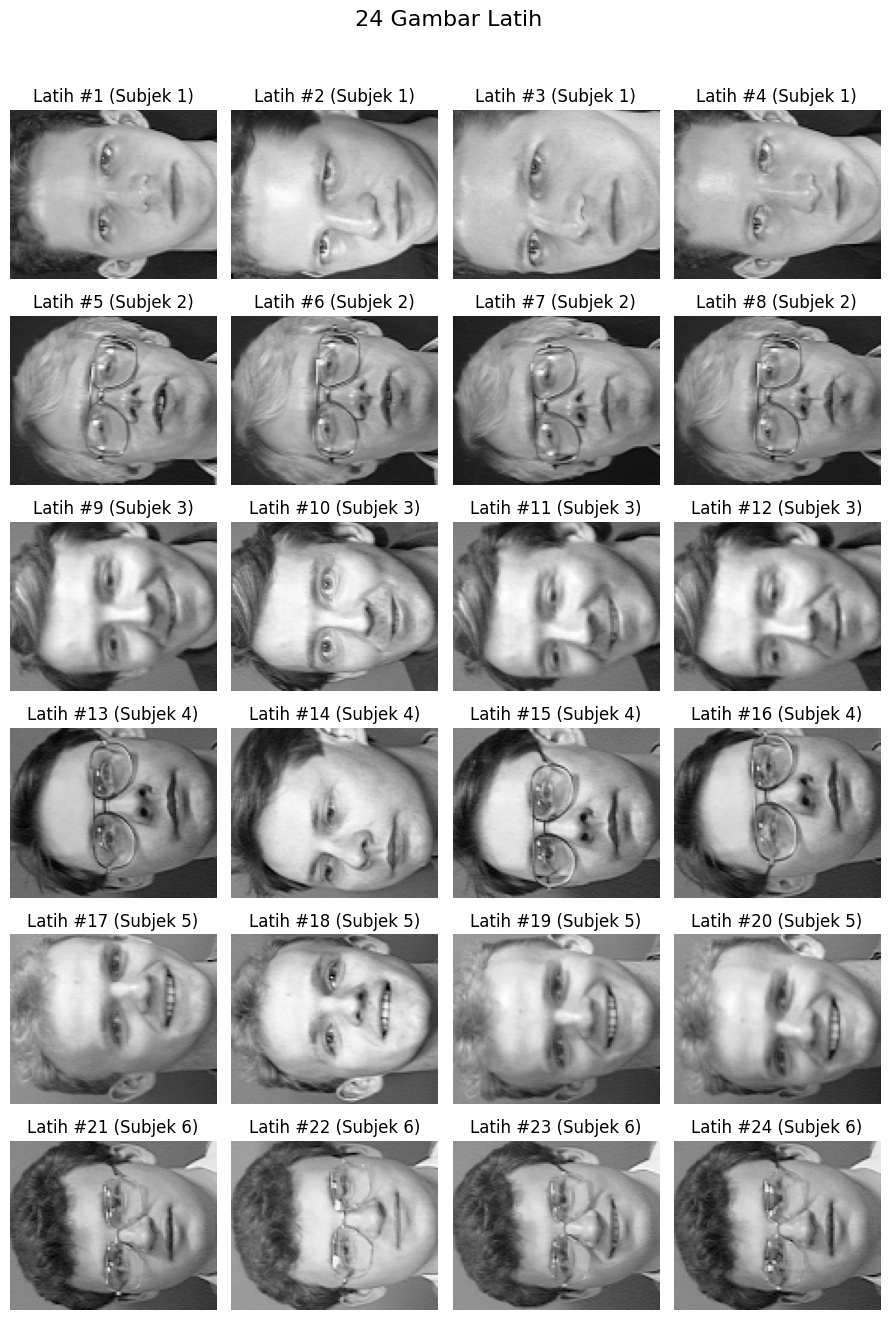

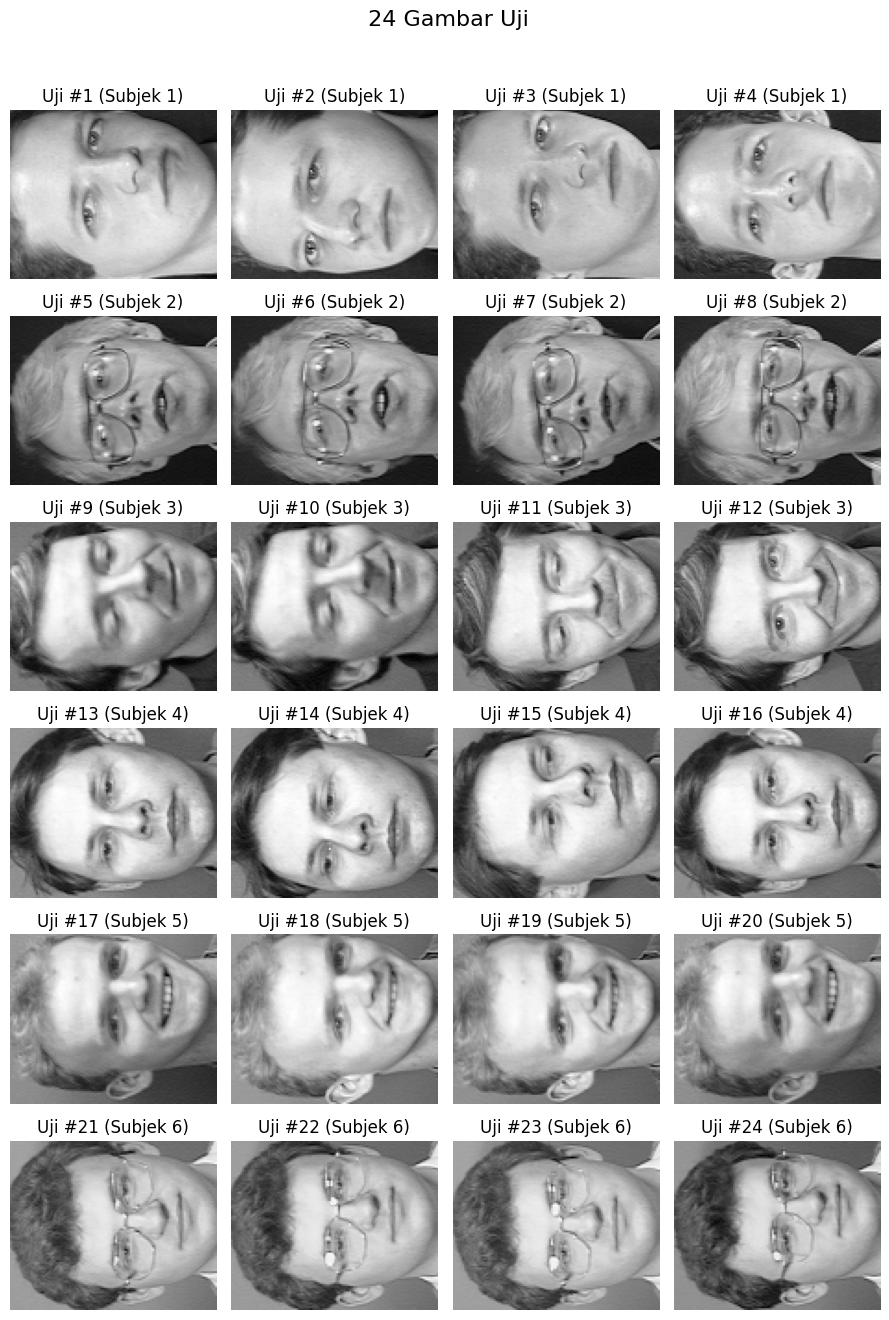

In [ ]:
# --- GAMBAR 1: GALERI DATA LATIH ---

# Membuat figure dan set subplot untuk data latih
fig_train, axes_train = plt.subplots(6, 4, figsize=(9, 14))

# Memberi judul utama untuk figure data latih
fig_train.suptitle(" 24 Gambar Latih", fontsize=16)

# Melakukan iterasi untuk setiap gambar latih dan menampilkannya
for i, ax in enumerate(axes_train.flat):
    image_vector = X_train[:, i]
    image_reshaped = image_vector.reshape(IMG_WIDTH, IMG_HEIGHT).T

    ax.imshow(image_reshaped, cmap='gray')
    ax.set_title(f"Latih #{i+1} (Subjek {y_train[i]})")
    ax.axis('off')

# Merapikan layout untuk figure data latih
fig_train.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


# --- GAMBAR 2: GALERI DATA UJI ---

# Membuat figure dan set subplot untuk data uji
fig_test, axes_test = plt.subplots(6, 4, figsize=(9, 14))

# Memberi judul utama untuk figure data uji
fig_test.suptitle(" 24 Gambar Uji", fontsize=16)

# Melakukan iterasi untuk setiap gambar uji dan menampilkannya
for i, ax in enumerate(axes_test.flat):
    image_vector = X_test[:, i]
    image_reshaped = image_vector.reshape(IMG_WIDTH, IMG_HEIGHT).T

    ax.imshow(image_reshaped, cmap='gray')
    ax.set_title(f"Uji #{i+1} (Subjek {y_test[i]})")
    ax.axis('off')

# Merapikan layout untuk figure data uji
fig_test.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


##Menghitung Mean Face, SVD, dan Eigenfaces

In [ ]:
if DATASET_PATH:
    mean_face = X_train.mean(axis=1)
    X_centered = X_train - mean_face[:, np.newaxis]
    print("\nMelakukan SVD pada matriks data latih...")
    U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)
    print("SVD selesai.")
    print(f"Bentuk matriks U (eigenfaces): {mean_face.shape}")



Melakukan SVD pada matriks data latih...
SVD selesai.
Bentuk matriks U (eigenfaces): (10304,)


##Visualisasi Mean Face dan Eigenfaces

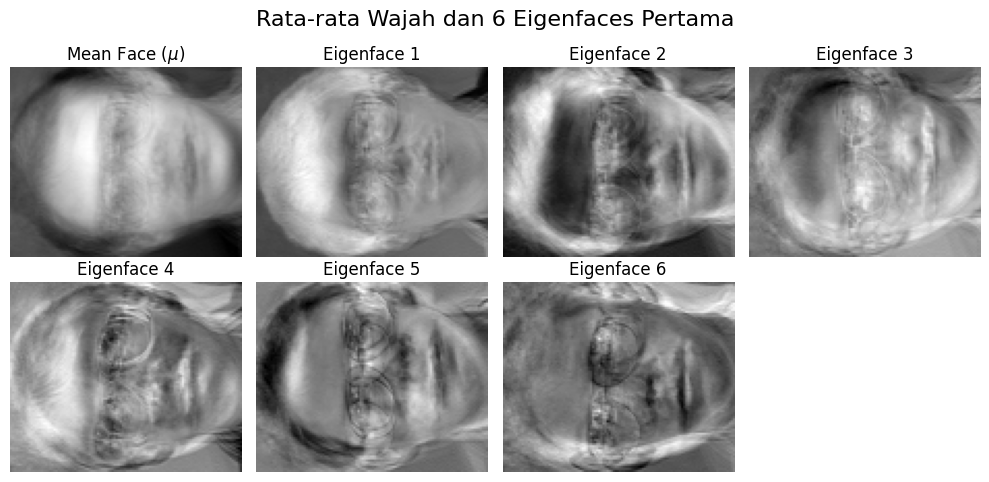

In [ ]:
if DATASET_PATH:
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 4, 1)
    plt.imshow(mean_face.reshape(IMG_WIDTH, IMG_HEIGHT).T, cmap='gray')
    plt.title("Mean Face ($\mu$)")
    plt.axis('off')

    for i in range(6):
        plt.subplot(2, 4, i + 2)
        eigenface_to_show = U[:, i]
        plt.imshow(eigenface_to_show.reshape(IMG_WIDTH, IMG_HEIGHT).T, cmap='gray')
        plt.title(f"Eigenface {i+1}")
        plt.axis('off')

    plt.suptitle("Rata-rata Wajah dan 6 Eigenfaces Pertama", fontsize=16)
    plt.tight_layout()
    plt.show()

## Proyeksi, Klasifikasi, dan Evaluasi Akurasi

In [ ]:
def classify_and_evaluate(k, U, X_train, y_train, X_test, y_test, mean_face):
    """Projects data, classifies, and returns accuracy results."""
    U_k = U[:, :k]

    X_train_centered = X_train - mean_face[:, np.newaxis]
    Z_train = U_k.T @ X_train_centered

    X_test_centered = X_test - mean_face[:, np.newaxis]
    Z_test = U_k.T @ X_test_centered

    correct_predictions = 0
    total_test_images = Z_test.shape[1]

    for i in range(total_test_images):
        test_vector = Z_test[:, i]
        distances = np.linalg.norm(Z_train - test_vector[:, np.newaxis], axis=0)
        nearest_neighbor_index = np.argmin(distances)
        predicted_label = y_train[nearest_neighbor_index]
        if predicted_label == y_test[i]:
            correct_predictions += 1

    accuracy = correct_predictions / total_test_images

    return {
        "k": k,
        "correct": correct_predictions,
        "total": total_test_images,
        "accuracy": accuracy
    }

if DATASET_PATH:
    results_list = []
    for k_value in [10, 20]:
        result = classify_and_evaluate(k_value, U, X_train, y_train, X_test, y_test, mean_face)
        results_list.append(result)

    # Menampilkan hasil dalam tabel
    table = PrettyTable()
    table.field_names = ["k (Jumlah Eigenfaces)", "Prediksi Benar", "Total Uji", "Akurasi"]
    for res in results_list:
        table.add_row([res['k'], res['correct'], res['total'], f"{res['accuracy']:.2%}"])

    print("\n--- Hasil Akurasi Klasifikasi ---")
    print(table)




--- Hasil Akurasi Klasifikasi ---
+-----------------------+----------------+-----------+---------+
| k (Jumlah Eigenfaces) | Prediksi Benar | Total Uji | Akurasi |
+-----------------------+----------------+-----------+---------+
|           10          |       21       |     24    |  87.50% |
|           20          |       21       |     24    |  87.50% |
+-----------------------+----------------+-----------+---------+


##Rekonstruksi Gambar


--- Rekonstruksi Gambar Uji ---


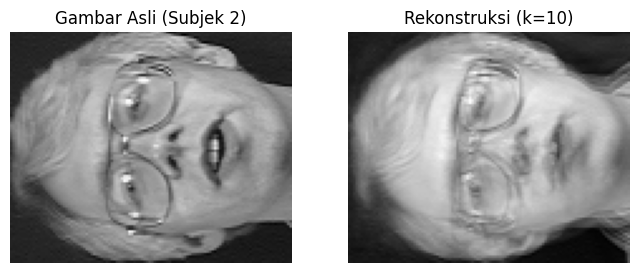

(10304,)



In [ ]:
def reconstruct_and_display(image_index, k, U, X_test, y_test, mean_face):
    """Reconstructs and displays a single face."""
    original_image_vec = X_test[:, image_index]
    true_label = y_test[image_index]

    U_k = U[:, :k]

    centered_image = original_image_vec - mean_face
    projected_coeffs = U_k.T @ centered_image
    reconstructed_centered = U_k @ projected_coeffs
    reconstructed_image = reconstructed_centered + mean_face

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image_vec.reshape(IMG_WIDTH, IMG_HEIGHT).T, cmap='gray')
    plt.title(f"Gambar Asli (Subjek {true_label})")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image.reshape(IMG_WIDTH, IMG_HEIGHT).T, cmap='gray')
    plt.title(f"Rekonstruksi (k={k})")
    plt.axis('off')
    plt.show()
    return reconstructed_image


if DATASET_PATH:
    print("\n--- Rekonstruksi Gambar Uji ---")
    reconimage = reconstruct_and_display(image_index=5, k=10, U=U, X_test=X_test, y_test=y_test, mean_face=mean_face)

